__________

# LESSON 1

In [455]:
# LIBRARIES WE USE IN THE NOTEBOOK
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand, seed

In [456]:
N_STATES = 2
S = np.zeros((2, 1))
P = np.zeros((2, 2))

S[0] = -1
S[1] = 1

P[0, 0] = 0.55
P[0, 1] = 1.0 - P[0, 0]
P[1, 1] = 0.55
P[1, 0] = 1.0 - P[1, 1]

# Display the state vector
print("State vector:\n", S)
# Display the transition matrix
print("Transition matrix:\n", P)
# Display the conditional mean vector
S_condmean = np.dot(P, S)
print("Conditional mean vector:\n", S_condmean)

State vector:
 [[-1.]
 [ 1.]]
Transition matrix:
 [[0.55 0.45]
 [0.45 0.55]]
Conditional mean vector:
 [[-0.1]
 [ 0.1]]


-1


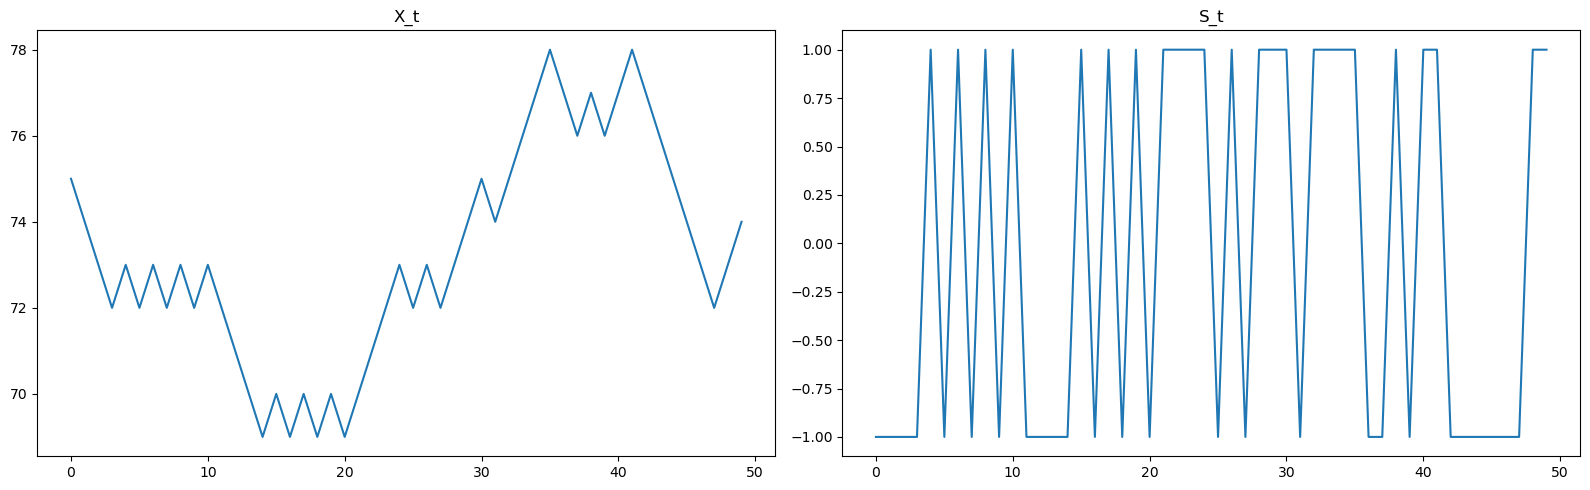

In [457]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, rand

# Set precision for output display and seed for reproducibility
np.set_printoptions(precision=3, suppress=True)
seed(12345)

# Constants
LEN_HIST = 50  # Length of the Markov chain
states = np.zeros((LEN_HIST, 2), dtype=np.int8)  # State matrix: stores state index and value
Xarray = np.zeros(LEN_HIST)  # Array to store the simulated values X_t
Psim = np.zeros((2, 2))  # Matrix to store transition counts for each state

# State dictionary and value mapping
S_DICT = {"1": 0, "2": 1}
S_VAL = {"1": -1, "2": 1}

# Display the value of state "1"
print(S_VAL["1"])

# Generate uniform random numbers for simulation
randarray = rand(LEN_HIST)

# Initialize process at state 1 (Python index 0)
states[0] = (S_DICT["1"], S_VAL["1"])
Xarray[0] = 75  # Initial value for X_t

# Simulate the Markov chain
for tt in range(1, LEN_HIST):
    prev_state_idx = states[tt - 1, 0]  # Previous state index
    prev_state_val = states[tt - 1, 1]  # Previous state value
    
    # Determine if we stay in the same state or switch
    if P[prev_state_idx, prev_state_idx] > randarray[tt]:
        # Stay in the same state
        states[tt] = states[tt - 1]
    else:
        # Switch states
        if prev_state_idx == S_DICT["1"]:
            states[tt] = [S_DICT["2"], S_VAL["2"]]
        else:
            states[tt] = [S_DICT["1"], S_VAL["1"]]
    
    # Update X_t based on the current state value
    Xarray[tt] = Xarray[tt - 1] + states[tt, 1]
    
    # Update the simulated transition matrix
    Psim[prev_state_idx, states[tt, 0]] += 1

# Plot the evolution of X_t and the state sequence S_t
plt.figure(figsize=(16, 5))

# Plot X_t (evolution of the simulated variable)
plt.subplot(1, 2, 1)
plt.plot(Xarray)
plt.title("X_t")

# Plot S_t (state transitions over time)
plt.subplot(1, 2, 2)
plt.plot(states[:, 1])
plt.title("S_t")

# Show the plots
plt.tight_layout()
plt.show()


In [458]:
# Compute estimated stationary distribution from the Monte Carlo exercise
Pstat = [1.0 - np.sum(states[:, 0]) / LEN_HIST, np.sum(states[:, 0]) / LEN_HIST]

print(Pstat)

# Compute the stationary distribution from the transition matrix.
# We can follow two methods:
# 1. Matrix multiplication
P2 = np.matmul(P, P)
print(P2)
P3 = np.matmul(P2, P)
print(P3)
P10 = np.linalg.matrix_power(P, 10)
print(P10)
P40 = np.linalg.matrix_power(P, 40)
print(P40)

# Sequential multiplication of a vector
p_stat = 0.5 * np.ones((2))
for t in range(1, 100):
    p_stat = np.dot(P.T, p_stat)

print(p_stat)

# Check this results with the matrix Pstat above (both methods should give the "same" results)

[0.52, 0.48]
[[0.505 0.495]
 [0.495 0.505]]
[[0.501 0.499]
 [0.499 0.501]]
[[0.5 0.5]
 [0.5 0.5]]
[[0.5 0.5]
 [0.5 0.5]]
[0.5 0.5]


In [459]:
import numpy as np
from numpy.random import seed, rand

# Seed the random number generator for reproducibility
seed(12345)

# Set NumPy options for better output formatting
np.set_printoptions(precision=3, suppress=True)

# Initial transition matrix (non-normalized)
P0 = np.array([
    [87.06, 9.06, 0.53, 0.05, 0.11, 0.03, 0.05, 0.0, 3.11],
    [0.48, 87.23, 7.77, 0.47, 0.05, 0.06, 0.02, 0.02, 3.89],
    [0.03, 1.6, 88.58, 5.0, 0.26, 0.11, 0.02, 0.05, 4.35],
    [0, 0.09, 3.25, 86.49, 3.56, 0.43, 0.1, 0.16, 5.92],
    [0.01, 0.03, 0.11, 4.55, 77.82, 6.8, 0.55, 0.63, 9.51],
    [0.0, 0.02, 0.07, 0.15, 4.54, 74.6, 4.96, 3.34, 12.33],
    [0.0, 0.0, 0.1, 0.17, 0.55, 12.47, 43.11, 28.3, 15.31],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0],
])

# Normalize transition matrix, ignoring the last column (NR type)
P = P0[:, :-1]  # Select all columns except the last
P = (P.T / np.sum(P, axis=1)).T  # Normalize each row

# Calculate the 10th and 200th powers of the transition matrix (long-term behavior)
P10 = np.linalg.matrix_power(P, 10)
P200 = np.linalg.matrix_power(P, 200)

# Display the transition matrix raised to the 10th and 200th power
print("P^10:\n", P10)
print("P^200:\n", P200)

# Simulation parameters
RATINGS = {"AAA": 0, "AA": 1, "A": 2, "BBB": 3, "BB": 4, "B": 5, "CCC": 6, "D": 7}
CURR_RATING = "D"  # Starting rating for the simulation

N_HISTORIES = 1000  # Number of simulated rating histories
LEN_HIST = 100  # Length of each simulated history

# Initialize the histories matrix, set initial ratings to CURR_RATING
histories = np.zeros((N_HISTORIES, LEN_HIST), dtype=np.int8)
histories[:, 0] = RATINGS[CURR_RATING]

# Generate random numbers for transition decisions
randarray = rand(N_HISTORIES, LEN_HIST)

# Variables to track default times
default_time = np.zeros(N_HISTORIES)
default_sum = 0  # To track the number of firms that default

# Simulate the Markov chain for each firm
for i in range(N_HISTORIES):
    for j in range(1, LEN_HIST):
        # Determine the next rating based on cumulative transition probabilities
        cumulative_probs = np.cumsum(P[histories[i, j - 1], :])
        histories[i, j] = np.searchsorted(cumulative_probs, randarray[i, j])

        # Check if the firm defaults (rating "D")
        if histories[i, j] == RATINGS["D"]:
            break

    # Record the time to default if it occurred
    if np.any(histories[i, :] == RATINGS["D"]):
        default_idx = np.where(histories[i, :] == RATINGS["D"])[0][0]
        default_time[i] = default_idx
        default_sum += 1

# Compute the average time to default
average_default_time = np.sum(default_time) / default_sum if default_sum > 0 else 0
print("Average default time:", average_default_time)


P^10:
 [[0.353 0.387 0.192 0.046 0.011 0.006 0.001 0.005]
 [0.021 0.42  0.395 0.124 0.021 0.01  0.002 0.008]
 [0.003 0.083 0.541 0.276 0.055 0.023 0.003 0.016]
 [0.001 0.019 0.182 0.515 0.156 0.07  0.01  0.047]
 [0.    0.005 0.044 0.203 0.311 0.228 0.031 0.178]
 [0.    0.002 0.012 0.054 0.154 0.302 0.045 0.432]
 [0.    0.001 0.005 0.018 0.052 0.115 0.018 0.79 ]
 [0.    0.    0.    0.    0.    0.    0.    1.   ]]
P^200:
 [[0.001 0.011 0.044 0.053 0.024 0.018 0.003 0.847]
 [0.001 0.01  0.04  0.047 0.022 0.016 0.002 0.862]
 [0.001 0.009 0.035 0.042 0.019 0.014 0.002 0.878]
 [0.    0.007 0.028 0.033 0.015 0.011 0.002 0.905]
 [0.    0.004 0.016 0.019 0.009 0.007 0.001 0.945]
 [0.    0.002 0.008 0.009 0.004 0.003 0.    0.973]
 [0.    0.001 0.003 0.003 0.002 0.001 0.    0.99 ]
 [0.    0.    0.    0.    0.    0.    0.    1.   ]]
Average default time: 0.0


In [460]:
import numpy as np
from numpy.random import seed, rand

# Set the random seed for reproducibility
seed(12345)

# Define the transition matrix P
P = np.array([
    [0.9, 0.09, 0.01],  # From Investment
    [0.1, 0.85, 0.05],  # From Speculative
    [0.0, 0.0, 1.0]     # From Default (absorbing)
])

# Simulation parameters
RATINGS = {"Investment": 0, "Speculative": 1, "Default": 2}
CURR_RATING = "Speculative"  # Starting from the Speculative rating

N_HISTORIES = 1000  # Number of simulated rating histories
LEN_HIST = 100  # Length of each simulated history (100 years)

# Initialize the histories matrix, set initial ratings to Speculative
histories = np.zeros((N_HISTORIES, LEN_HIST), dtype=np.int8)
histories[:, 0] = RATINGS[CURR_RATING]

# Generate random numbers for transition decisions
randarray = rand(N_HISTORIES, LEN_HIST)

# Variables to track default times
default_time = np.zeros(N_HISTORIES)
default_sum = 0  # To track the number of firms that default

# Simulate the Markov chain for each firm
for i in range(N_HISTORIES):
    for j in range(1, LEN_HIST):
        # Determine the next rating based on cumulative transition probabilities
        cumulative_probs = np.cumsum(P[histories[i, j - 1], :])
        histories[i, j] = np.searchsorted(cumulative_probs, randarray[i, j])

        # Check if the firm defaults (rating "Default")
        if histories[i, j] == RATINGS["Default"]:
            break

    # Record the time to default if it occurred
    if np.any(histories[i, :] == RATINGS["Default"]):
        default_idx = np.where(histories[i, :] == RATINGS["Default"])[0][0]
        default_time[i] = default_idx
        default_sum += 1

# Compute the average time to default
average_default_time = np.sum(default_time) / default_sum if default_sum > 0 else 0
print("Average default time:", average_default_time)


Average default time: 27.663124335812967


________

# LESSON 2

## **1. Bond Valuation with Ratings Transition Matrix**

Consider a corporation that has an outstanding bond that has been rated as BB and matures in 5 years, with a 4% coupon. The current forward interest rates for years 1 to 4 appear in the table below. With this information and the transition matrix that we introduced in Lesson 1, we can compute a **one-year-ahead estimate** of the bond value.

* **Step 1**. Compute the present value of the bond + coupon in one year's time using the forward rates.

* **Step 2**. Compute the expected value of the bond and the distribution of value changes using the transition matrix.

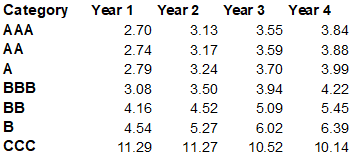

In [461]:
# LIBRARIES WE USE IN THE NOTEBOOK
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand, seed
from scipy.stats import norm

In [462]:
RATINGS = dict(
    [
        ("AAA", 0),
        ("AA", 1),
        ("A", 2),
        ("BBB", 3),
        ("BB", 4),
        ("B", 5),
        ("CCC", 6),
        ("D", 7),
    ]
)
CURR_RATING = "B"
VAR_PR = 99.0
COUPON = 4.0

P0 = np.array(
    [
        [87.06, 9.06, 0.53, 0.05, 0.11, 0.03, 0.05, 0.0, 3.11],
        [0.48, 87.23, 7.77, 0.47, 0.05, 0.06, 0.02, 0.02, 3.89],
        [0.03, 1.6, 88.58, 5.0, 0.26, 0.11, 0.02, 0.05, 4.35],
        [0, 0.09, 3.25, 86.49, 3.56, 0.43, 0.1, 0.16, 5.92],
        [0.01, 0.03, 0.11, 4.55, 77.82, 6.8, 0.55, 0.63, 9.51],
        [0.0, 0.02, 0.07, 0.15, 4.54, 74.6, 4.96, 3.34, 12.33],
        [0.0, 0.0, 0.1, 0.17, 0.55, 12.47, 43.11, 28.3, 15.31],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0],
    ]
)


F = np.array(
    [
        [2.70, 3.13, 3.55, 3.84],
        [2.74, 3.17, 3.59, 3.88],
        [2.79, 3.24, 3.70, 3.99],
        [3.08, 3.50, 3.94, 4.22],
        [4.16, 4.52, 5.09, 5.45],
        [4.54, 5.27, 6.02, 6.39],
        [11.29, 11.27, 10.52, 10.14],
    ]
)
print("Forward rates matrix\n", F)

N_RATINGS = P0.shape[0]
print("Number of Ratings =", N_RATINGS)
N_YEARS = F.shape[1]
print("Number of years in the forward rates matrix =", N_YEARS)
MAT = 5
print("Bond maturity: ", MAT)

Forward rates matrix
 [[ 2.7   3.13  3.55  3.84]
 [ 2.74  3.17  3.59  3.88]
 [ 2.79  3.24  3.7   3.99]
 [ 3.08  3.5   3.94  4.22]
 [ 4.16  4.52  5.09  5.45]
 [ 4.54  5.27  6.02  6.39]
 [11.29 11.27 10.52 10.14]]
Number of Ratings = 8
Number of years in the forward rates matrix = 4
Bond maturity:  5


In [463]:
# Normalize transition matrix, ignoring NR type
P = P0[:, 0 : P0.shape[1] - 1]  # noQA E203
P = (P.T / np.sum(P, axis=1)).T

print("Transition Matrix (normalized):\n", P)

Transition Matrix (normalized):
 [[0.899 0.094 0.005 0.001 0.001 0.    0.001 0.   ]
 [0.005 0.908 0.081 0.005 0.001 0.001 0.    0.   ]
 [0.    0.017 0.926 0.052 0.003 0.001 0.    0.001]
 [0.    0.001 0.035 0.919 0.038 0.005 0.001 0.002]
 [0.    0.    0.001 0.05  0.86  0.075 0.006 0.007]
 [0.    0.    0.001 0.002 0.052 0.851 0.057 0.038]
 [0.    0.    0.001 0.002 0.006 0.147 0.509 0.334]
 [0.    0.    0.    0.    0.    0.    0.    1.   ]]


In [464]:
import numpy as np

# Constant for recovery value when in default state
D_RECOVERY = 50.0

# Assuming COUPON, N_RATINGS, N_YEARS, and F are already defined elsewhere in the code

# Initialize bond values array for each rating
bond_values = np.zeros(N_RATINGS)

# Set bond value for default state (last rating)
bond_values[N_RATINGS - 1] = D_RECOVERY

# Compute bond values for non-default ratings
for r in range(N_RATINGS - 1):
    bond_values[r] = COUPON  # Start with the coupon value
    for t in range(N_YEARS):
        # Adjust bond value based on future coupon payments and face value (at maturity)
        face_value = 100 if t == N_YEARS - 1 else 0
        discount_factor = (1 + (F[r, t] / 100.0)) ** (t + 1)
        bond_values[r] += (COUPON + face_value) / discount_factor

# Output the computed bond values
print("Bond values:\n", bond_values)

# Calculate the bond value one year ahead based on transition probabilities
pw_values = np.multiply(bond_values, P[RATINGS[CURR_RATING], :])
bond_val = np.sum(pw_values)

# Output the bond value for one-year-ahead prediction
print("Bond value (one-year ahead):", bond_val)


Bond values:
 [104.707 104.561 104.165 103.328  99.058  95.969  84.461  50.   ]
Bond value (one-year ahead): 93.74781605994036


## **2. Two Absorbing States: Gambler's Ruin**

Now, consider the following situation. A gambler bets on the outcome of a sequence of independent fair coin tosses. With each heads, the gambler gains one dollar. With each tails, the gambler loses one dollar. The gambler stops betting after reaching a fortune of $\overline{S}$ dollars or after emptying their pockets.

*   What are the probabilities of each stopping outcome?
*   How long will it take for the gambler, in expectation, to arrive at one of the stopping outcomes?

To answer these questions, we can model this setting as a Markov chain on the state space $\mathcal{S}\in\{0,1,...,\overline{s}\}$. The gambler starts with initial money $k\in\mathcal{S}$, and $s_t$ represents the money in the gambler's pocket at time $t$. Thus, we have that, for $0\lt s_t \lt \overline{s}$:

*   $\mathbb{P}(s_{t+1}=s_t+1|s_{t})=0.5$
*   $\mathbb{P}(s_{t+1}=s_t-1|s_{t})=0.5$

States 0 and $\overline{s}$ are absorbing states because any sequence of draws from the Markov chain stops after reaching any of those situations. Alternatively, we can think that $\mathbb{P}(s_{t+1}=s_t|s_{t}=\overline{s})=\mathbb{P}(s_{t+1}=s_t|s_{t}=0)=1$. We can then represent the $(\overline{s}+1)\times(\overline{s}+1)$ transition matrix as:
$$
\begin{align}
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 &\cdots & 0 \\
0.5 & 0 & 0.5 & 0 & 0 &\cdots & 0 \\
0 & 0.5 & 0 & 0.5 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots& \cdots & \vdots \\
0 & 0 & 0 & 0.5 & 0 & 0.5 & 0 \\
0 & 0 & 0 & 0 & 0.5 & 0 & 0.5 \\
0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
\end{align} 
$$
Before solving this with math, let's see some Monte Carlo simulation results (in this example, the gambler stops betting after reaching a fortune of 5 USD and starts with 1 USD):

In [465]:
import numpy as np
from numpy.random import seed

# Seed the random number generator for reproducibility
seed(12345)

# Parameters for the purse process
TARGET_PURSE = 5
INIT_PURSE = 1
N_STATES = TARGET_PURSE + 1  # Number of possible purse states (from 0 to TARGET_PURSE)

# Initialize state and transition matrices
S = np.zeros((N_STATES, 1))  # State vector
P = np.zeros((N_STATES, N_STATES))  # Transition matrix

# Set absorbing states at 0 and TARGET_PURSE (no transitions out of these states)
P[0, 0] = 1.0  # Absorbing state at 0 (purse exhausted)
P[N_STATES - 1, N_STATES - 1] = 1.0  # Absorbing state at TARGET_PURSE

# Fill in the transition probabilities for non-absorbing states
for ii in range(1, N_STATES - 1):
    P[ii, ii - 1] = 0.5  # Probability of decreasing purse by 1
    P[ii, ii + 1] = 0.5  # Probability of increasing purse by 1

# Output the transition matrix
print("Transition matrix:\n", P)


Transition matrix:
 [[1.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  1. ]]


In [466]:
import numpy as np
from numpy.random import rand

# Parameters for simulation
N_HISTORIES = 100000  # Number of simulations
LEN_HIST = 100  # Length of each simulation (maximum steps)
INIT_PURSE = 6  # Initial purse value
TARGET_PURSE = 25  # Target purse value to win

# Initialize the histories array and fill in the initial purse
histories = np.zeros((N_HISTORIES, LEN_HIST))
histories[:, 0] = INIT_PURSE  # Set the initial purse for each simulation

# Generate random numbers for all simulations
randarray = rand(N_HISTORIES, LEN_HIST)

# Simulate the gambling process
for i in range(N_HISTORIES):
    for j in range(1, LEN_HIST):
        # Update purse based on random number (heads/tails)
        histories[i, j] = histories[i, j - 1] + (randarray[i, j] >= 0.5) - (randarray[i, j] < 0.5)
        
        # Stop the simulation if the target is reached or the player is broke
        if histories[i, j] >= TARGET_PURSE or histories[i, j] < 1:
            # Fill remaining history with the final value (either TARGET_PURSE or 0)
            histories[i, j+1:] = histories[i, j]
            break

# Count how many simulations reached the target
target_num = np.sum(np.max(histories, axis=1) == TARGET_PURSE)

# Calculate the stopping times for each simulation
end_gamble = np.zeros(N_HISTORIES)
end_gamble_sum = 0  # Counter for the number of valid simulations

for i in range(N_HISTORIES):
    if np.max(histories[i, :]) == TARGET_PURSE:
        # Find the step where the player reaches the target purse
        end_gamble[i] = np.where(histories[i, :] == TARGET_PURSE)[0][0]
        end_gamble_sum += 1
    elif np.min(histories[i, :]) < 1:
        # Find the step where the player loses all their money
        end_gamble[i] = np.where(histories[i, :] < 1)[0][0]
        end_gamble_sum += 1

# Count how many simulations ended with losing all money
broke_num = np.sum(np.min(histories, axis=1) < 1)

# Output results
print("Probability of reaching the target:", target_num / N_HISTORIES)
print("Probability of losing all the money:", broke_num / N_HISTORIES)
print("Expected time until reaching a stopping result:", np.sum(end_gamble) / end_gamble_sum)
print("Total number of simulations with stopping result:", end_gamble_sum)


Probability of reaching the target: 0.05457
Probability of losing all the money: 0.54548
Expected time until reaching a stopping result: 40.30312473960503
Total number of simulations with stopping result: 60005


In [467]:
# seed random number generator
seed(12345)

TARGET_PURSE = 25
INIT_PURSE = 6

N_STATES = TARGET_PURSE + 1

S = np.zeros((N_STATES, 1))
P = np.zeros((N_STATES, N_STATES))

P[0, 0] = 1.0
P[N_STATES - 1, N_STATES - 1] = 1.0

for ii in range(1, N_STATES - 1):
    for jj in range(0, N_STATES):
        if jj == ii - 1 or jj == ii + 1:
            P[ii, jj] = 0.5

print("Transition matrix:\n", P)

N_HISTORIES = 100000  # number of histories or simulations
LEN_HIST = 100  # Length of each simulation
histories = np.zeros((N_HISTORIES, LEN_HIST))
histories[:, 0] = INIT_PURSE * np.ones(N_HISTORIES)
randarray = rand(N_HISTORIES, LEN_HIST)

for i in range(0, N_HISTORIES):
    for j in range(1, LEN_HIST):
        histories[i, j] = (
            histories[i, j - 1] + (randarray[i, j] >= 0.5) - (randarray[i, j] < 0.5)
        )
        if histories[i, j] == TARGET_PURSE or histories[i, j] < 1:
            histories[i, j + 1 : LEN_HIST + 1] = histories[i, j]  # noQA E203
            break

target_num = np.sum(np.max(histories, axis=1) == TARGET_PURSE)

end_gamble = np.zeros(N_HISTORIES)
end_gamble_sum = 0

for i in range(0, N_HISTORIES):
    if np.max(histories[i, :]) == TARGET_PURSE:
        where_gamble_ends_T = np.where((histories[i, :] == TARGET_PURSE))
        end_gamble[i] = where_gamble_ends_T[0][0]
        end_gamble_sum += 1
    elif np.min(histories[i, :]) < 1:
        where_gamble_ends_0 = np.where((histories[i, :] < 1))
        end_gamble[i] = where_gamble_ends_0[0][0]
        end_gamble_sum += 1
    else:
        end_gamble[i] = 0.0

broke_num = np.sum(np.min(histories, axis=1) < 1)

print(
    "Probability of getting the target:",
    target_num / N_HISTORIES,
    "\nProbability of losing all the money:",
    broke_num / N_HISTORIES,
)
print(
    "Expected time until reaching a stopping result:",
    np.sum(end_gamble) / end_gamble_sum,
    "\nTotal number of simulations:",
    end_gamble_sum,
)

Transition matrix:
 [[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.

Using Monte Carlo, we've seen that the probability of getting the target, that is to get $\overline{s}=5$, is equal to 20%. On the other hand, the probability of getting zero (losing all the money) is equal to 80%. Finally, we also know that the expected time until reaching either zero or $\overline{s}=5$ is equal to 4. In the next section, we show that these results are already known using simple math.

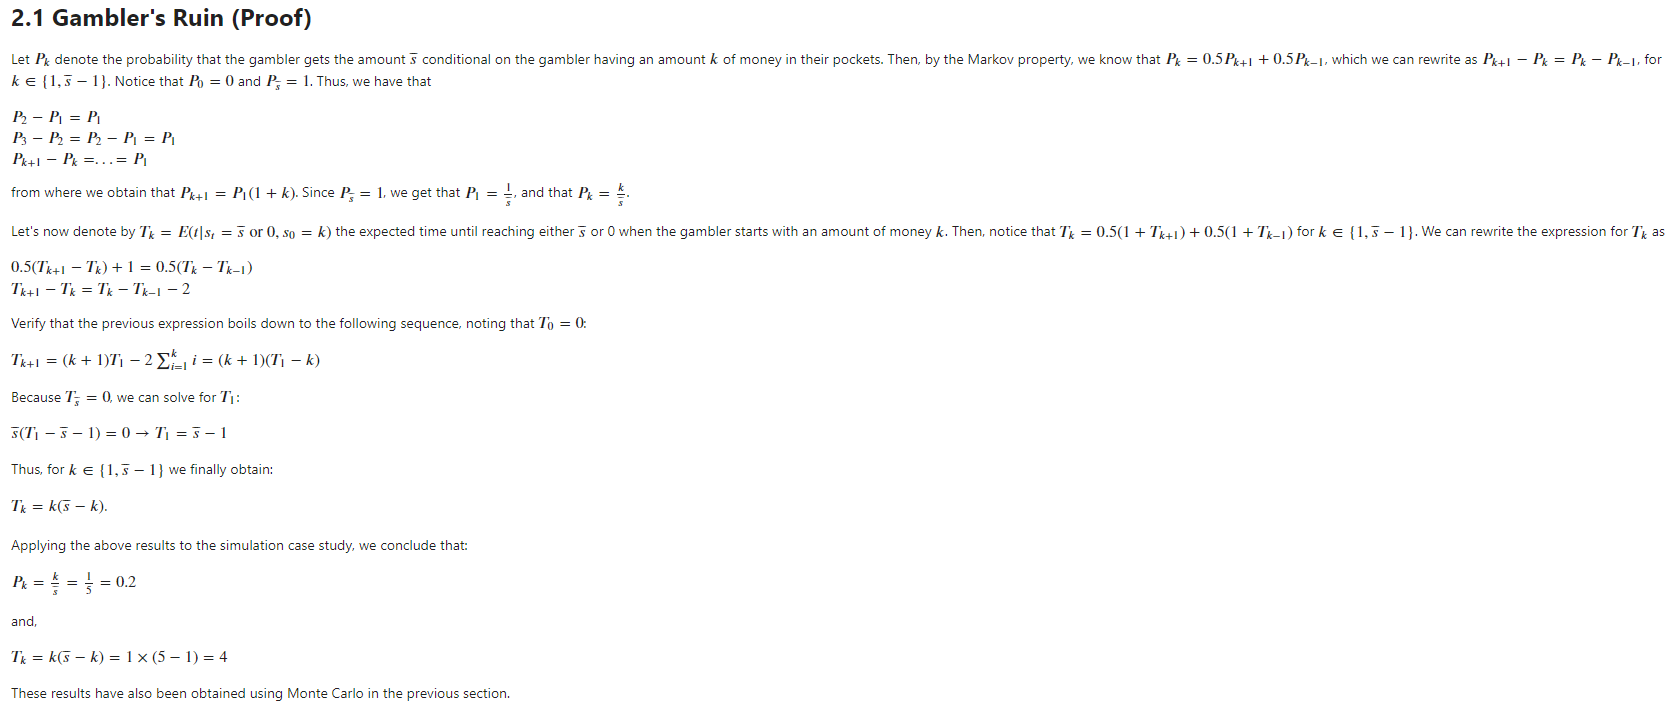

## **3. Markov-Chain Representation of a First-Order Autoregressive Process**

Sometimes, we deal with situations where our random variable of interest follows a continuous autoregressive process, i.e., a continuous Markov process. For simulation or optimization purposes, it is useful to follow a discretization method that preserves the main properties of the continuous process. The discretization involves constructing the Markov-chain that is "equivalent" to the autoregressive random variable. Let's cover two methods to achieve such discretization.

Consider a continuous random variable $z_t$ that follows a first-order autoregressive process (AR(1)):
$$
\begin{align}
z_t = \rho z_{t-1} + \varepsilon_t
\end{align}
$$
where $|\rho|\lt 1$, and $\varepsilon_t$ is white noise with variance $\sigma_{\varepsilon}^2$. The process is covariance-stationary with mean zero and variance $\sigma_{\varepsilon}^2/(1-\rho^2)$. If, in addition, $\varepsilon_t$ is normally distributed in each period, then $z_t$ is also normally distributed.

In all methods below, we are going to construct a grid of $N$ potential realizations of $z_t$, $\mathcal{Z}=\{z_1,...,z_N\}$, with an associated transition matrix P.

**Tauchen Method**

We set the upper and lower bounds of the Markov chain as:
$$
\begin{align}
z_1 = -\lambda \\
z_N = \lambda
\end{align}
$$
where $\lambda$ is $m$ times the unconditional standard deviation of the autoregressive process, $\sigma_\varepsilon/\sqrt{1-\rho^2}$. Then, construct the remaining grid points using an equally distributed space:
$$
\begin{align}
z_i = z_1 + \frac{z_N-z_1}{N-1}(i-1)\ \text{for}\ i=1,...,N \\
\end{align} 
$$
Let $m_i=\frac{z_{i+1}+z_i}{2}$ denote the mid-point between grid points $i$ and $i+1$. The transition probabilities $p_{ij}$ are given by:
$$
\begin{align}
& p_{ij} = \Phi\left(\frac{m_j-\rho z_i}{\sigma_\varepsilon}\right) - \Phi\left(\frac{m_{j-1}-\rho z_i}{\sigma_\varepsilon}\right)\ \text{for}\ j=2,...,N-1 \\
& p_{i1} = \Phi\left(\frac{m_1-\rho z_i}{\sigma_\varepsilon}\right)\\
& p_{iN} = 1-\Phi\left(\frac{m_{N-1}-\rho z_i}{\sigma_\varepsilon}\right)\\
\end{align}
$$
We can calibrate $\lambda$ by matching the actual unconditional variance of the autoregressive process. That is, we solve $\sum_i^N \pi_i z_i(\lambda)^2 = \sigma_{\varepsilon}^2/(1-\rho^2)$, where $\pi_i$ is the stationary distribution of the discretized Markov process.

**Rouwenhorst Method**

The Rouwenhorst discretization method begins with an equally spaced grid $\mathcal{Z}=\{z_1,...,z_N\}$ where $z_1=-z_N$. Then, choosing $p$ and $q$, we build the following matrix $P_2$:
$$
\begin{align}
P_2 = \begin{bmatrix}
p & 1-p \\
1-q & q
\end{bmatrix}
\end{align}
$$
then, for each $k=3,...,N$:
$$
\begin{align}
P_k = p \begin{bmatrix}
P_{k-1} & \mathbf{0} \\
\mathbf{0}' & 0
\end{bmatrix}
+ (1-p) \begin{bmatrix}
 \mathbf{0} & P_{k-1} \\
 0 & \mathbf{0}'
\end{bmatrix}
+ (1-q) \begin{bmatrix}
 \mathbf{0}' &  0\\
 P_{k-1} & \mathbf{0}
\end{bmatrix}
+ q \begin{bmatrix}
 0 &  \mathbf{0}' \\
\mathbf{0} & P_{k-1} 
\end{bmatrix}
\end{align}
$$
where $\mathbf{0}$ represents a column vector of zeros with size $k-1$. Then, the transition matrix of the discretized process is $P_N$ after dividing by two all but the top and bottom rows so that the conditional probabilities add up to one. Because the first-order serial correlation of this process will be $p+q-1$ then, if we set $\pi=p=q$, we can choose $\pi=(1+\rho)/2$. Notice that setting $p\neq q$ would introduce conditional heteroskedasticity in the model. 

Besides, the variance of the discretized project is $z_N^2/(N-1)$ so that we can directly calibrate the bound $z_N$ to match the variance of the continuous process, $z_N = \sqrt{\frac{N-1}{1-\rho^2}}\sigma_\varepsilon$. 

Let's compare the performance of both methods. We opt for arbitrarily picking the bound $\lambda$ for Tauchen's method, leaving its calibration as an optional exercise.

In [468]:
import numpy as np
from scipy.stats import norm

# Tauchen method for approximating an AR(1) process
def tauchen_method(RHO, SIGMA, LAMBDA, N_GRID):
    # Compute the bounds for the grid
    start_tauchen = -LAMBDA * SIGMA / np.sqrt(1 - RHO**2)
    end_tauchen = -start_tauchen
    
    # Create the grid of state values
    zgrid_tauchen = np.linspace(start_tauchen, end_tauchen, N_GRID)
    zmid_points = (zgrid_tauchen[1:] + zgrid_tauchen[:-1]) / 2  # Midpoints of the grid
    
    # Initialize the transition probability matrix
    P_tauchen = np.zeros((N_GRID, N_GRID))
    
    # Boundary transition probabilities
    P_tauchen[:, 0] = norm.cdf((zmid_points[0] - RHO * zgrid_tauchen) / SIGMA)
    P_tauchen[:, -1] = 1.0 - norm.cdf((zmid_points[-1] - RHO * zgrid_tauchen) / SIGMA)
    
    # Fill in the transition probabilities for the interior grid points
    for i in range(N_GRID):
        for j in range(1, N_GRID - 1):
            P_tauchen[i, j] = (
                norm.cdf((zmid_points[j] - RHO * zgrid_tauchen[i]) / SIGMA) - 
                norm.cdf((zmid_points[j - 1] - RHO * zgrid_tauchen[i]) / SIGMA)
            )
    
    return P_tauchen, zgrid_tauchen

# Rouwenhorst method for approximating an AR(1) process
def rouwen_method(RHO, SIGMA, N_GRID):
    # Set up the Rouwenhorst parameters
    p_rouwen = (1 + RHO) * 0.5
    q_rouwen = p_rouwen
    
    # Compute the grid boundaries
    start_rouwen = -np.sqrt((N_GRID - 1) / (1 - RHO**2)) * SIGMA
    end_rouwen = -start_rouwen
    zgrid_rouwen = np.linspace(start_rouwen, end_rouwen, N_GRID)
    
    # Initialize the transition matrix for the first step (2x2 matrix)
    P_rouwen = np.array([[p_rouwen, 1.0 - p_rouwen], [1.0 - q_rouwen, q_rouwen]])
    
    # Expand the transition matrix iteratively
    for i in range(2, N_GRID):
        m1 = np.pad(P_rouwen, ((0, 1), (0, 1)), 'constant')
        m2 = np.pad(P_rouwen, ((0, 1), (1, 0)), 'constant')
        m3 = np.pad(P_rouwen, ((1, 0), (0, 1)), 'constant')
        m4 = np.pad(P_rouwen, ((1, 0), (1, 0)), 'constant')
        
        # Update the transition matrix
        P_rouwen = (
            p_rouwen * m1 + (1 - p_rouwen) * m2 + (1 - q_rouwen) * m3 + q_rouwen * m4
        )
        
        # Scale the interior probabilities to maintain consistency
        P_rouwen[1:i, :] *= 0.5
    
    return P_rouwen, zgrid_rouwen


In [469]:
# Parameters
RHO = 0.975
SIGMA = 0.1
N_GRID = 9
LAMBDA = 2.0  # Used in Tauchen method

# Generate transition matrices and grids using Tauchen and Rouwenhorst methods
P_tauchen, zgrid_tauchen = tauchen_method(RHO, SIGMA, LAMBDA, N_GRID)
P_rouwen, zgrid_rouwen = rouwen_method(RHO, SIGMA, N_GRID)

# Initialize stationary distributions (uniform at the start)
p_stat_tauchen = np.ones((N_GRID, 1)) / N_GRID
p_stat_rouwen = np.ones((N_GRID, 1)) / N_GRID

# Iterate to find stationary distributions
for _ in range(100):  # 100 iterations should suffice for convergence
    p_stat_tauchen = np.dot(P_tauchen.T, p_stat_tauchen)
    p_stat_rouwen = np.dot(P_rouwen.T, p_stat_rouwen)

# Calculate the unconditional moments (mean and standard deviation)

# Tauchen method
tauchen_mean_stat = np.dot(p_stat_tauchen.T, zgrid_tauchen) / N_GRID
tauchen_sd_stat = np.sqrt(np.dot(p_stat_tauchen.T, (zgrid_tauchen - tauchen_mean_stat) ** 2))

# Rouwenhorst method
rouwen_mean_stat = np.dot(p_stat_rouwen.T, zgrid_rouwen) / N_GRID
rouwen_sd_stat = np.sqrt(np.dot(p_stat_rouwen.T, (zgrid_rouwen - rouwen_mean_stat) ** 2))

# Print results for comparison with theoretical moments
print(
    "Checking the unconditional mean....",
    f"Tauchen Mean: {tauchen_mean_stat[0]:.5f}",
    f"Rouwen Mean: {rouwen_mean_stat[0]:.5f}",
    f"Theoretical Mean: {0:.5f}",
)
print(
    "Checking the unconditional standard deviation....",
    f"Tauchen SD: {tauchen_sd_stat[0]:.5f}",
    f"Rouwen SD: {rouwen_sd_stat[0]:.5f}",
    f"Theoretical SD: {SIGMA / np.sqrt(1 - RHO**2):.5f}",
)


Checking the unconditional mean.... Tauchen Mean: -0.00000 Rouwen Mean: 0.00000 Theoretical Mean: 0.00000
Checking the unconditional standard deviation.... Tauchen SD: 0.45671 Rouwen SD: 0.45334 Theoretical SD: 0.45004


The next step is to simulate using both methods. We just have to choose the number of simulations (`LEN_HIST`) in the following script.

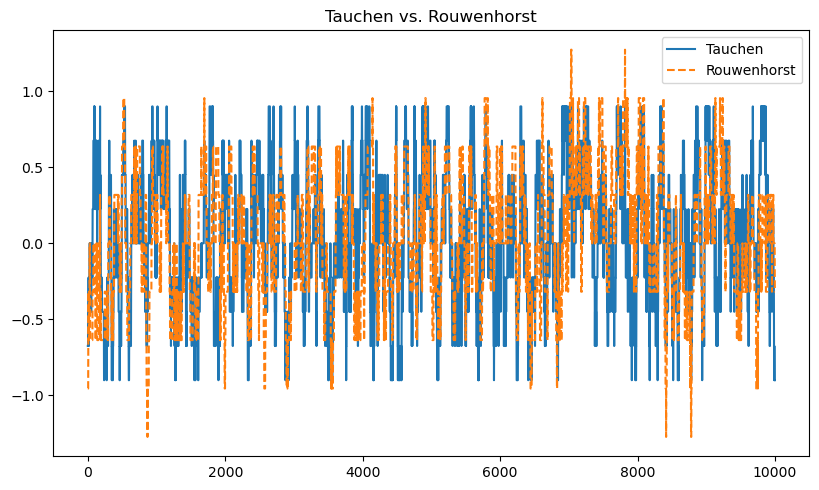

In [470]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, rand

# Seed the random number generator for reproducibility
seed(12345)

# Parameters for the simulation
LEN_HIST = 10000  # Number of time steps in the simulation

# Initialize arrays for Tauchen simulation
histories_tauchen_st = np.zeros(LEN_HIST, dtype=np.int8)  # State history for Tauchen method
histories_tauchen_z = np.zeros(LEN_HIST)  # Z-grid history for Tauchen method
histories_tauchen_st[0] = 1  # Initial state
histories_tauchen_z[0] = zgrid_tauchen[histories_tauchen_st[0]]  # Initial Z value

# Initialize arrays for Rouwenhorst simulation
histories_rouwen_st = np.zeros(LEN_HIST, dtype=np.int8)  # State history for Rouwenhorst method
histories_rouwen_z = np.zeros(LEN_HIST)  # Z-grid history for Rouwenhorst method
histories_rouwen_st[0] = 1  # Initial state
histories_rouwen_z[0] = zgrid_rouwen[histories_rouwen_st[0]]  # Initial Z value

# Generate random numbers for the simulation
randarray = rand(LEN_HIST)

# Simulate the Monte Carlo process for both Tauchen and Rouwenhorst methods
for j in range(1, LEN_HIST):
    # Update for Tauchen method
    for r in range(N_GRID):
        if randarray[j] < np.cumsum(P_tauchen[histories_tauchen_st[j - 1], :])[r]:
            histories_tauchen_z[j] = zgrid_tauchen[r]
            histories_tauchen_st[j] = r
            break
    
    # Update for Rouwenhorst method
    for r in range(N_GRID):
        if randarray[j] < np.cumsum(P_rouwen[histories_rouwen_st[j - 1], :])[r]:
            histories_rouwen_z[j] = zgrid_rouwen[r]
            histories_rouwen_st[j] = r
            break

# Plot the results of both simulations for comparison
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(histories_tauchen_z, label='Tauchen')
plt.plot(histories_rouwen_z, label='Rouwenhorst', linestyle='--')
plt.title("Tauchen vs. Rouwenhorst")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Finally, we want to measure the performance of the simulations. In other words, we are going to compute the mean, variance, and autocorrelation coefficient of both series and compare them with the real ones. Notice that we add a burn-in period (`T_EXCLUDE`), meaning an extra piece that we add at the start of the time series while simulating but throw away later. When you simulate a time series, the first part you simulate will not follow your chosen model and must be discarded.

In [471]:
# Define burn-in period to exclude initial values
T_EXCLUDE = 100

# Compute mean for Tauchen and Rouwenhorst simulations
tauchen_mean = np.mean(histories_tauchen_z[T_EXCLUDE:LEN_HIST])
rouwen_mean = np.mean(histories_rouwen_z[T_EXCLUDE:LEN_HIST])

# Print the computed means and compare to the real mean (which is 0)
print(f"Real mean: 0, Tauchen mean: {tauchen_mean:.5f}, Rouwenhorst mean: {rouwen_mean:.5f}")

# Compute standard deviation (SD) for Tauchen and Rouwenhorst simulations
tauchen_sd = np.std(histories_tauchen_z[T_EXCLUDE:LEN_HIST])
rouwen_sd = np.std(histories_rouwen_z[T_EXCLUDE:LEN_HIST])

# Print the computed standard deviations and compare to the real SD
real_sd = SIGMA / np.sqrt(1 - RHO**2)
print(f"Real sd: {real_sd:.5f}, Tauchen sd: {tauchen_sd:.5f}, Rouwenhorst sd: {rouwen_sd:.5f}")

# Compute covariance for Tauchen and Rouwenhorst (for autocorrelation calculation)
tauchen_cov = np.cov(
    histories_tauchen_z[T_EXCLUDE:LEN_HIST-1],  # Z(t)
    histories_tauchen_z[T_EXCLUDE+1:LEN_HIST]   # Z(t+1)
)
rouwen_cov = np.cov(
    histories_rouwen_z[T_EXCLUDE:LEN_HIST-1],  # Z(t)
    histories_rouwen_z[T_EXCLUDE+1:LEN_HIST]   # Z(t+1)
)

# Compute autocorrelation coefficients (rho)
tauchen_rho = tauchen_cov[0, 1] / tauchen_cov[0, 0]
rouwen_rho = rouwen_cov[0, 1] / rouwen_cov[0, 0]

# Print the computed autocorrelation coefficients and compare to the real rho
print(f"Real rho: {RHO}, Tauchen rho: {tauchen_rho:.5f}, Rouwenhorst rho: {rouwen_rho:.5f}")


Real mean: 0, Tauchen mean: 0.03614, Rouwenhorst mean: 0.04063
Real sd: 0.45004, Tauchen sd: 0.44027, Rouwenhorst sd: 0.42336
Real rho: 0.975, Tauchen rho: 0.96629, Rouwenhorst rho: 0.97289


Of course, we can improve the results by using more simulations, playing with the "grid size" in both methods and/or with "LAMBDA" in Tauchen's method.

The above algorithms are already available, for instance, in the following Python library: https://quanteconpy.readthedocs.io/en/latest/markov/approximation.html#



_________________

# M4 - Hidden Markov Models

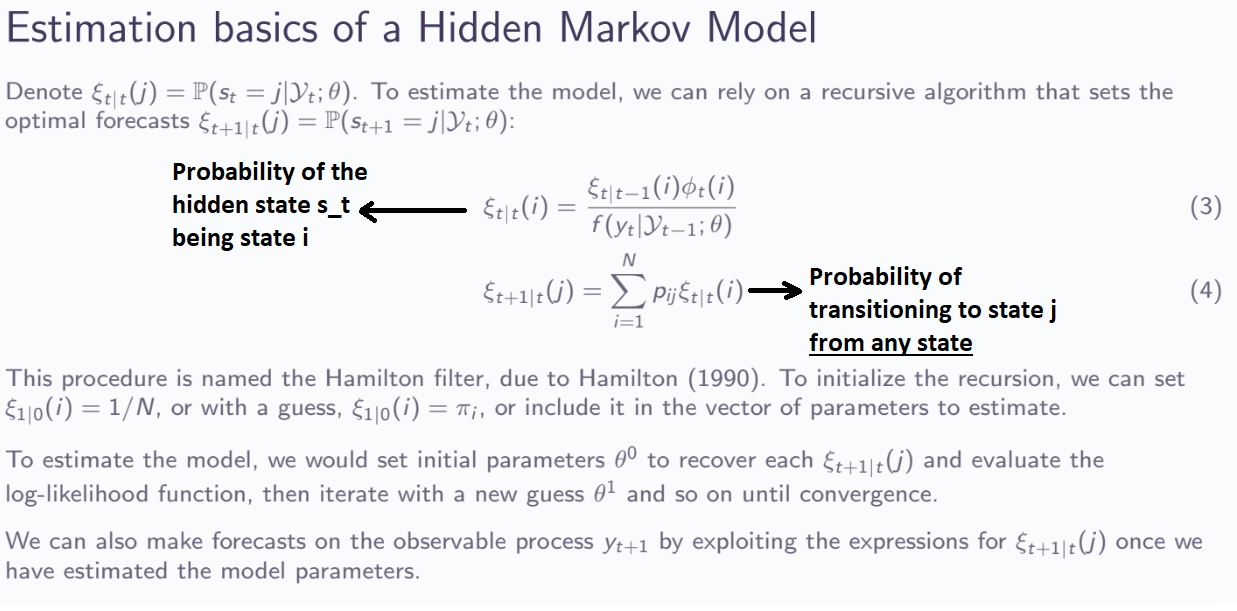

[ 0.864  1.645  0.884  1.214  0.638  1.195  1.83   1.437  0.41   0.896
  0.725  0.374  0.362  1.941 -0.446]


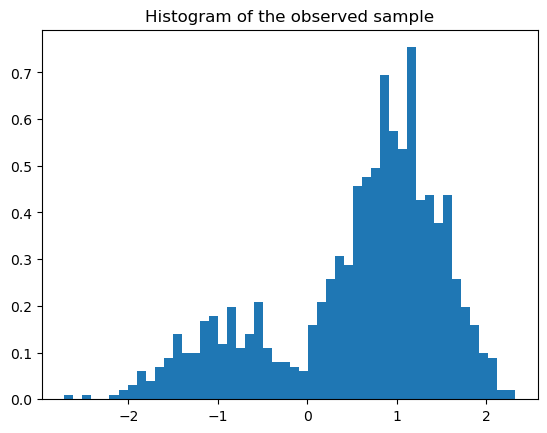

In [472]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand, seed
from scipy.stats import norm

# Parameters for the simulation
P = np.zeros((2, 2))  # Transition probability matrix
P[0, 0] = 0.45
P[0, 1] = 1.0 - P[0, 0]
P[1, 1] = 0.85
P[1, 0] = 1.0 - P[1, 1]

seed(12345)  # Set seed for reproducibility

# Simulation parameters
LEN_HIST = 1500  # Length of the simulation
SIGMA = 0.5  # Standard deviation of the noise
BURNIN = 500  # Number of burn-in samples to discard
T_SAMPLE = LEN_HIST - BURNIN  # Actual sample length after burn-in

# Initialize state and value arrays
states_st = np.zeros(LEN_HIST, dtype=np.int8)  # State sequence
states_vt = np.zeros(LEN_HIST)  # Corresponding values for states
Yarray = np.zeros(T_SAMPLE)  # Observed sample

# State and value dictionaries
S_DICT = {"1": 0, "2": 1}
S_VAL = {"1": -1, "2": 1}

# Generate random numbers for state transitions and noise
randarray = rand(LEN_HIST)
rnandarray = np.random.normal(0.0, SIGMA, size=LEN_HIST)

# Initialize process at state 1 (index 0 in Python)
states_st[0] = S_DICT["1"]
states_vt[0] = S_VAL["1"]

# Generate the hidden Markov sequence and observed sample
tt2 = 0  # Time index for the observed sample
for tt in range(1, LEN_HIST):
    # Determine the next state based on transition probabilities
    if P[states_st[tt - 1], states_st[tt - 1]] > randarray[tt]:
        states_st[tt] = states_st[tt - 1]
        states_vt[tt] = states_vt[tt - 1]
    else:
        # Switch to the other state
        if states_st[tt - 1] == S_DICT["1"]:
            states_st[tt] = S_DICT["2"]
            states_vt[tt] = S_VAL["2"]
        else:
            states_st[tt] = S_DICT["1"]
            states_vt[tt] = S_VAL["1"]
    
    # Record observed data after burn-in period
    if tt >= BURNIN:
        Yarray[tt2] = states_vt[tt] + rnandarray[tt]
        tt2 += 1

# Print the first 15 observations in the Yarray
print(Yarray[:15])

# Plot the histogram of the observed sample
plt.hist(Yarray, 50, density=True)
plt.title("Histogram of the observed sample")
plt.show()


After creating the time series, we define the functions that are needed to estimate the model.<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

In [473]:
import numpy as np
from scipy.stats import norm

# Hamilton filtering (Forward algorithm)
def forward_alg(pi0, N, T, P, mu, sigma, Y):
    xi_prob_t = np.zeros((T, N))  # Filtered probabilities
    xi_prob_t1 = np.zeros((T, N))  # One-step ahead predictions

    # Initialization for t=1
    y_like = likelihood(pi0, mu, sigma, Y[0])  # Initial likelihood
    phi = np.array([norm.pdf((Y[0] - mu[ss2]) / sigma) for ss2 in range(N)])  # Initial phi
    xi_prob_t[0, :] = np.multiply(pi0, phi) / y_like  # Update filtered probabilities
    xi_prob_t1[0, :] = np.dot(P.T, xi_prob_t[0, :])  # One-step ahead predictions

    # Recursive filtering for t=2,...,T
    for tt in range(1, T):
        y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])  # Update likelihood
        phi = np.array([norm.pdf((Y[tt] - mu[ss2]) / sigma) for ss2 in range(N)])  # Update phi
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like  # Update filtered probabilities
        xi_prob_t1[tt, :] = np.dot(P.T, xi_prob_t[tt, :])  # Update one-step ahead predictions

    return xi_prob_t, xi_prob_t1

# Function to compute likelihood
def likelihood(xi_prob, mu, sigma, y):
    phi = norm.pdf((y - mu) / sigma)  # Compute the pdf for the current observation
    y_like = np.dot(xi_prob, phi)  # Compute the likelihood

    return y_like

# Log-likelihood function for parameter estimation
def log_likelihood(theta, pi0, sigma, T, Y):
    # 1. Extract parameters from theta
    P = np.zeros((2, 2))
    P[0, 0] = theta[0]
    P[0, 1] = 1 - P[0, 0]
    P[1, 1] = theta[1]
    P[1, 0] = 1 - P[1, 1]
    
    mu = theta[2:4]  # Mean values for the two states

    # 2. Forward algorithm
    xi_prob_t, xi_prob_t1 = forward_alg(pi0, 2, T, P, mu, sigma, Y)

    # 3. Evaluate the likelihood for all time steps
    y_like = np.zeros(T)
    y_like[0] = likelihood(pi0, mu, sigma, Y[0])  # Initial likelihood
    for tt in range(1, T):
        y_like[tt] = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])  # Recursive likelihood update

    sum_log_like = -np.sum(np.log(y_like))  # Compute negative log-likelihood

    return sum_log_like


In [474]:
# Set guess of initial distribution and vector of mu's
pi0 = [0.4, 0.6]
mu = [-2, 2]
xi_prob_t, xi_prob_t1 = forward_alg(pi0, 2, T_SAMPLE, P, mu, SIGMA, Yarray)
print(xi_prob_t)

# Test Log likelihood evaluation
y_like = likelihood(xi_prob_t[20, :], mu, SIGMA, Yarray[20])
theta = np.reshape(P, 2 * 2)
theta = np.append(theta, mu, axis=0)
theta = np.append(theta, [SIGMA], axis=0)

sum_log_like = log_likelihood(theta, pi0, 2, T_SAMPLE, Yarray)

print(sum_log_like)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
1044.977919074794


In [475]:
import numpy as np
import scipy.optimize as sco

# Log-likelihood optimization function
def log_likelihood_opt(pi0, sigma, T, Y):
    args = (pi0, sigma, T, Y)

    # Set bounds for the parameters: P[0, 0], P[1, 1], mu[0], mu[1]
    bounds = [(0.0, 1.0), (0.0, 1.0), (-2, 0), (0, 2)]

    # Minimize the log-likelihood using trust-constr method
    result = sco.minimize(
        log_likelihood,
        np.array([pi0[0], pi0[1], -0.5, 0.5]),  # Initial guess for [P[0,0], P[1,1], mu[0], mu[1]]
        args=args,
        method="trust-constr",
        bounds=bounds,
        tol=1e-2,
    )

    return result

# Set initial distribution guess (pi0) and vector of mu values
pi0 = [0.4, 0.6]
mu = [-2, 2]

# Optimize the log-likelihood function
lik_model = log_likelihood_opt(pi0, SIGMA, T_SAMPLE, Yarray)

# Extract optimized parameters
thetahat = lik_model.x

# Display the optimized parameters
print("Optimized parameters (thetahat):", thetahat)

# Rebuild the transition matrix Phat using the optimized P[0,0] and P[1,1]
Phat = np.zeros((2, 2))
Phat[0, 0] = thetahat[0]
Phat[0, 1] = 1.0 - Phat[0, 0]
Phat[1, 1] = thetahat[1]
Phat[1, 0] = 1.0 - Phat[1, 1]

# Extract the optimized mu values
muhat = np.array([thetahat[2], thetahat[3]])

# Run the forward algorithm using the optimized parameters
xi_prob_t, xi_prob_t1 = forward_alg(pi0, 2, T_SAMPLE, Phat, muhat, SIGMA, Yarray)

# Display the filtered probabilities
print("Filtered probabilities (xi_prob_t):\n", xi_prob_t)


Optimized parameters (thetahat): [ 0.421  0.844 -0.989  0.999]
Filtered probabilities (xi_prob_t):
 [[0.001 0.999]
 [0.    1.   ]
 [0.    1.   ]
 ...
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]]


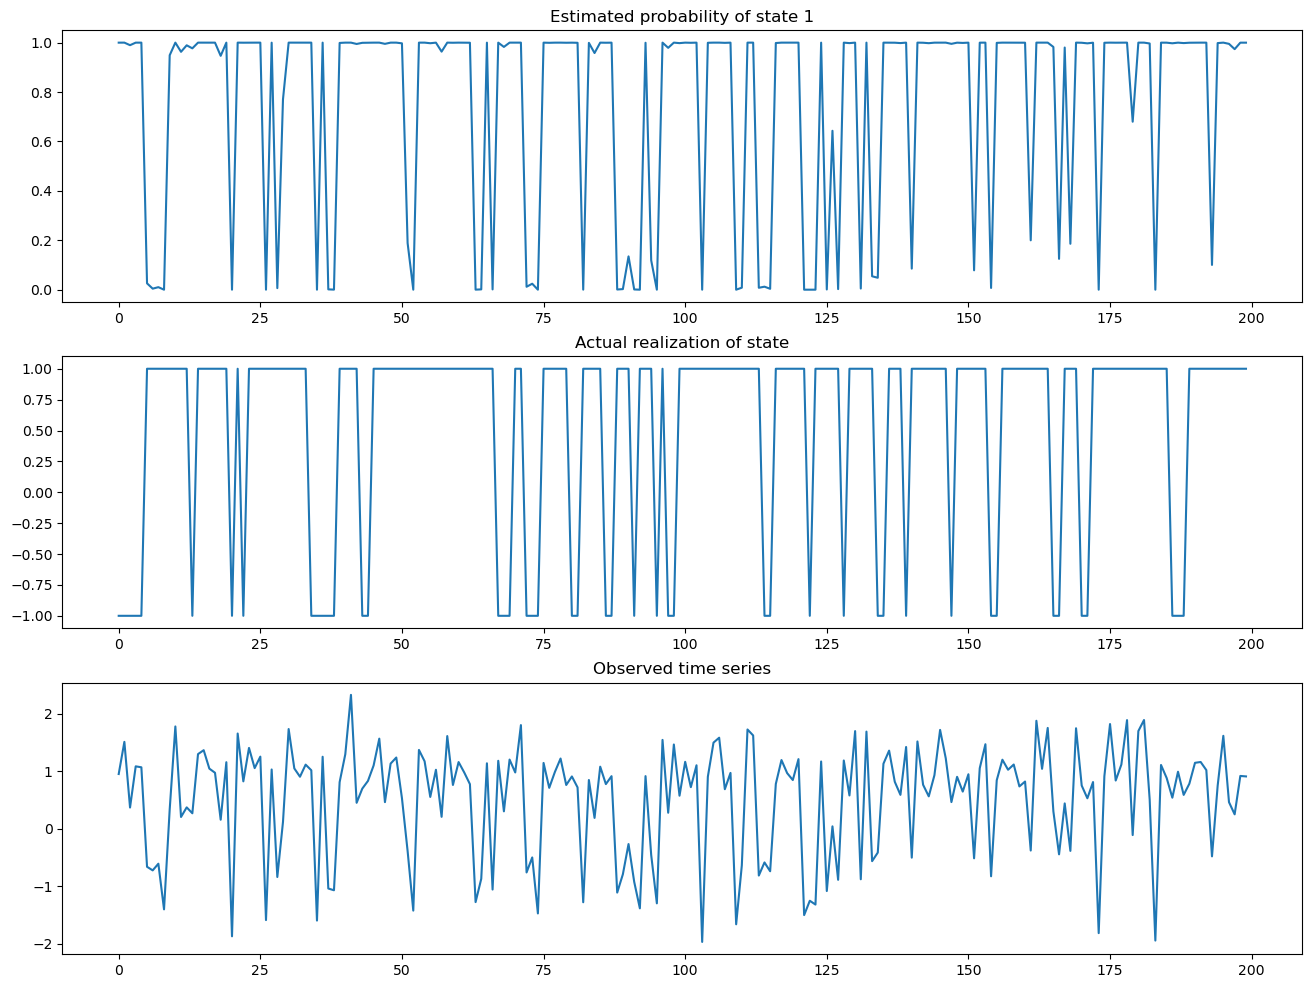

In [476]:
plt.subplot(3, 1, 1)
plt.plot(xi_prob_t[400:600, 1])
plt.title("Estimated probability of state 1")
plt.subplot(3, 1, 2)
plt.plot(states_vt[400:600])
plt.title("Actual realization of state")
plt.subplot(3, 1, 3)
plt.plot(Yarray[400:600])
plt.title("Observed time series")

fig = plt.gcf()
fig.set_size_inches(16, 12)
plt.show()

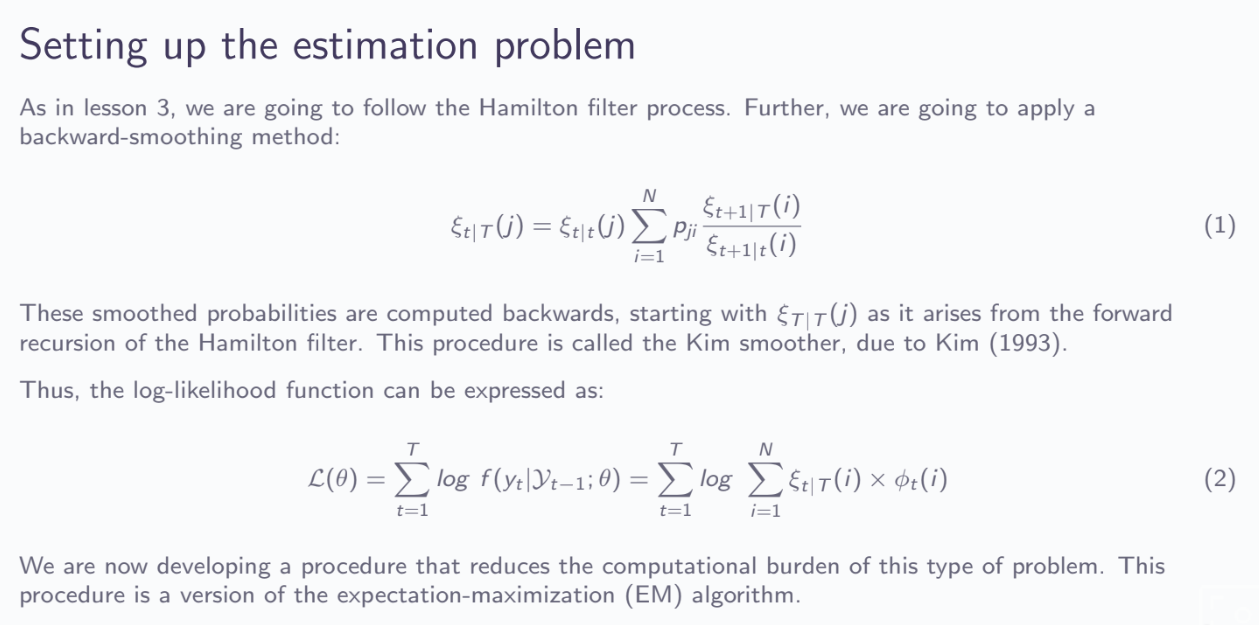

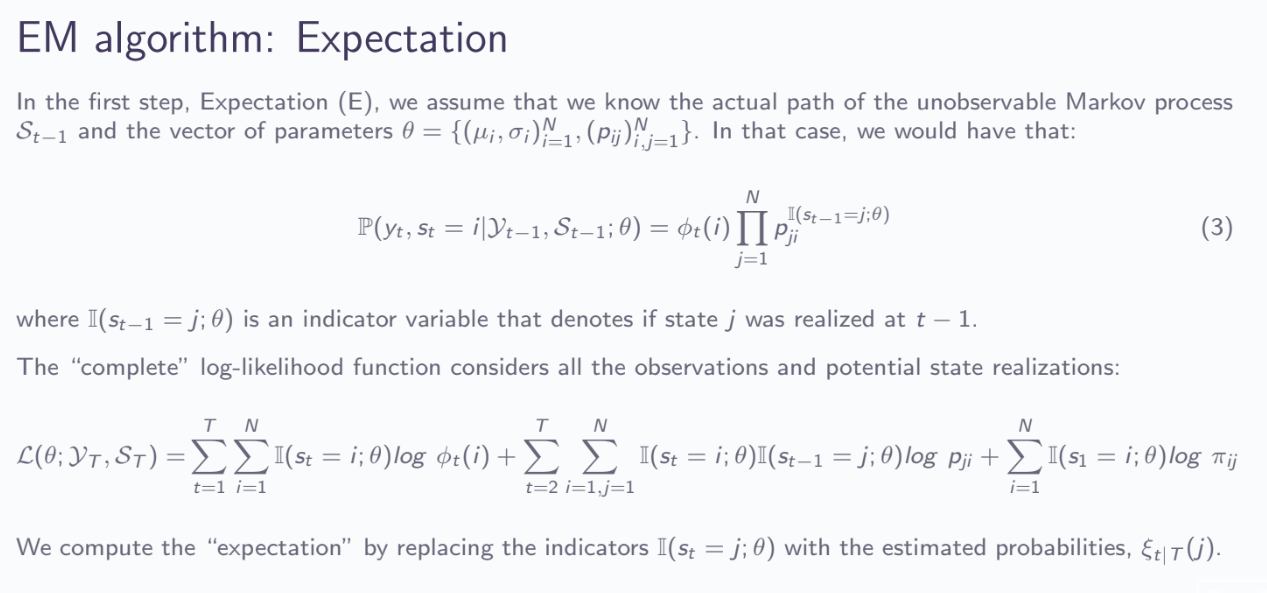

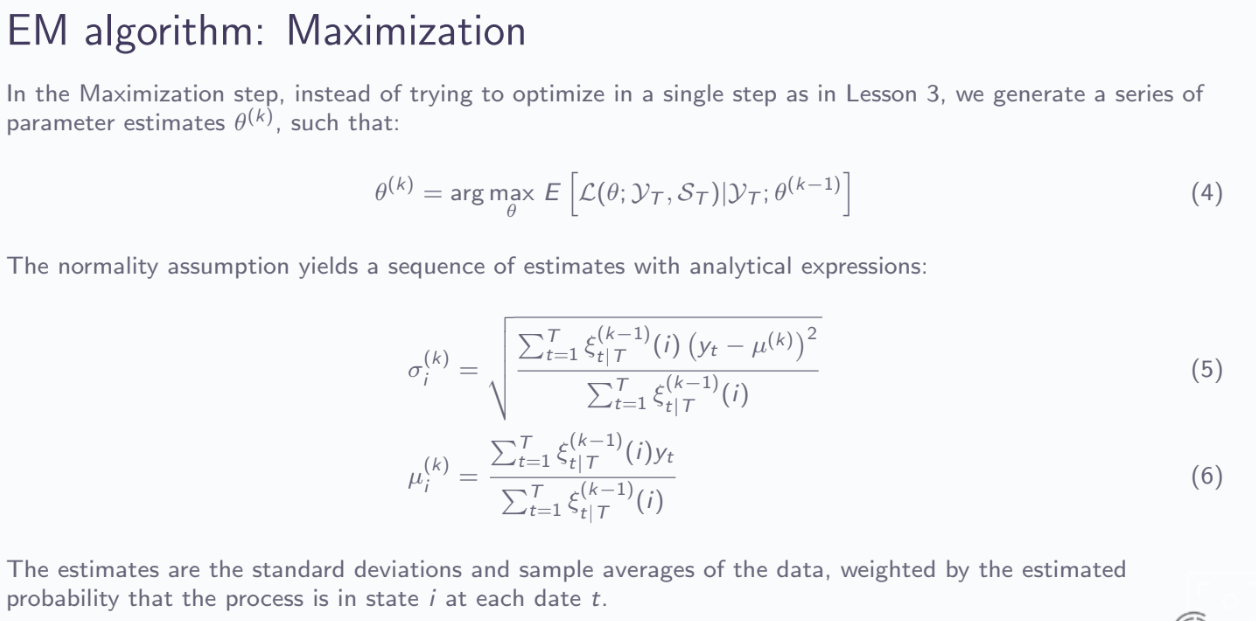

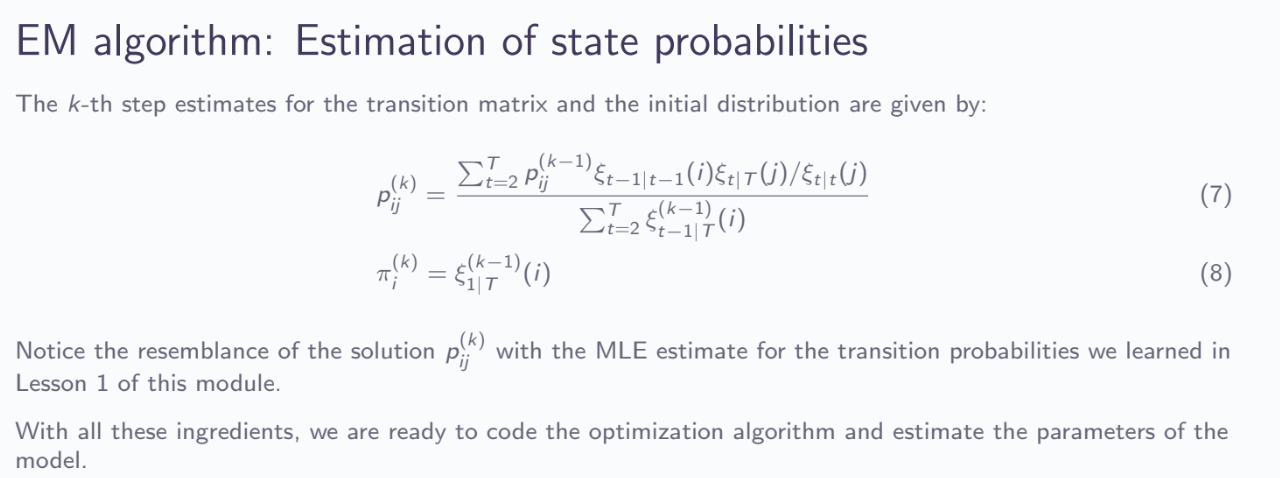

## **1. Regime Changes and the EM Algorithm: An Application for VIX**

Now we are going to develop a specific application where we will estimate a regime-switching model for the daily realizations of the CBOE's VIX index, which is a popular measure of the stock market's expectation of volatility based on S&P 500 index option volatilities.

Assume that the observable VIX process is $y_{t}= \mu_t + \varepsilon_t$, where $\varepsilon_t$ is drawn from a normal distribution with mean zero and variance $\sigma_t^2$. The conditional mean and variance of the process at each time both depend on the outcome of a Markov process with $N$ possible realizations, i.e., we have a tuple $\{(\mu_i,\sigma_i)_{i=1}^N\}$ and an associated transition matrix P.

As in the previous example, we are going to follow the Hamilton filter process. However, we are going to apply a smoothing method that allows us to obtain inferences about the probability of each state that conditions on the whole observable process $\mathcal{Y}_T$:
$$
\begin{align}
\xi_{t|T}(j) = \xi_{t|t}(j) \sum_{i=1}^N p_{ji} \frac{\xi_{t+1|T}(i)}{\xi_{t+1|t}(i)}
\end{align}
$$
These smoothed probabilities are computed backwards, starting with $\xi_{T|T}(j)$ as it arose from the forward recursion developed above. This procedure is called the Kim smoother, as developed by Kim (1993).

Thus, the log-likelihood function can be expressed as:
$$
\begin{align}
\mathcal{L}(\theta) = \sum_{t=1}^T log\ f(y_t|\mathcal{Y}_{t-1};\theta) = \sum_{t=1}^T log\ \sum_{i=1}^N \xi_{t|T}(i) \times \phi_{t}(i)
\end{align}
$$
where $\phi_{t}(i)=\phi\left(\frac{y_t-\mu_i}{\sigma_i}\right)$.

In the previous example, we opted for a "brute force" maximization of the likelihood, but we are now going to develop a particular procedure that reduces the computational burden of this type of problem. This procedure is a version of the Expectation-Maximization (EM) algorithm. 

In the first step, Expectation (E), we assume that we know the actual path of the unobservable Markov process $\mathcal{S}_t$. In that case, we would have that:
$$
\begin{align}
\mathbb{P}(y_t,s_t=i|\mathcal{Y}_{t-1},\mathcal{S}_{t-1};\theta) & = \mathbb{P}(y_t|\mathcal{S}_{t};\theta)\mathbb{P}(s_t=i|\mathcal{S}_{t-1};\theta) \\ & = \phi_{t}(i)\prod_{j=1}^N \mathbb{P}(s_t=i|s_{t-1}=j;\theta)^{\mathbb{I}(s_{t-1}=j;\theta)} \\ & = \phi_{t}(i)\prod_{j=1}^N p_{ji}^{\mathbb{I}(s_{t-1}=j;\theta)}
\end{align}
$$
where $\mathbb{I}(s_{t-1}=j;\theta)$ is an indicator variable that denotes if state $j$ was realized at $t-1$. Then, the joint log-likelihood of the observations can be expressed as:
$$
\begin{align}
log\ \mathbb{P}(y_t,s_t=i|\mathcal{Y}_{t-1},\mathcal{S}_{t-1};\theta) = log\ \phi_{t}(i) +  \sum_{j=1}^M  log\ p_{ji} \times {\mathbb{I}(s_{t-1}=j;\theta)}
\end{align}
$$
Because at $t=1$ we do not observe any past history, we need to estimate or fix in advance an initial probability $\pi_j$ such that:
$$
\begin{align}
log\ \mathbb{P}(y_1,s_1=i;\theta) = log\ \phi_{t}(i) + log\ \pi_{i}
\end{align}
$$
We can now build the following log-likelihood function that considers all the potential realizations of $s_t$ (the "complete" likelihood):
$$
\begin{align}
\mathcal{L}(\theta;\mathcal{Y}_T,\mathcal{S}_T) = & \sum_{t=1}^T \sum_{i=1}^N \mathbb{I}(s_{t}=i;\theta) log\ \phi_{t}(i) + \\ & +  \sum_{t=2}^T \sum_{i=1,j=1}^N \mathbb{I}(s_{t}=i;\theta)\mathbb{I}(s_{t-1}=j;\theta) log\ p_{ji} + \\ 
& +  \sum_{i=1}^N \mathbb{I}(s_{1}=i;\theta)log\ \pi_{ij}
\end{align}
$$
The crucial step now is to take the expectation of the expression above by substituting the indicators $\mathbb{I}(s_{t}=j;\theta)$ with the corresponding probabilities estimated above $\xi_{t|T}(j)$. The terms $\mathbb{I}(s_{t}=j;\theta)\mathbb{I}(s_{t-1}=i;\theta)$ can be replaced by $p_{ij}\xi_{t|t}(i)\xi_{t+1|T}(j)/\xi_{t+1|t}(j)$ that arises from the each specific component of the Kim filter that arises from each state $j$.

With all these ingredients, we have completed the E step, given a guess for the parameter vector $\theta=\{(\mu_i,\sigma_i)_{i=1}^N,(p_{ij})_{i,j=1}^N\}$.

In the maximization step, instead of trying to optimize in a single step as we did in the previous lecture, we generate a series of parameter estimates $\theta^{(k)}$, such that:
$$
\begin{align}
\theta^{(k)} = \arg\underset{\theta}{\max} E\left[\mathcal{L}(\theta;\mathcal{Y}_T,\mathcal{S}_T)|\mathcal{Y}_T;\theta^{(k-1)}\right]
\end{align}
$$
Until we reach convergence.

Indeed, the assumption of normality allows us to reach a sequence of estimates with analytical expressions. At step $k$, with the guessed vector of parameters $\theta^{(k-1)}$, differentiation of the log-likelihood function with respect to $\sigma_i$ yields:
$$
\begin{align}
\frac{\partial \sum_{t=1}^T \xi_{t|T}^{(k-1)}(i)\ log\ \phi_{it}}{\partial \sigma_i} = \sum_{t=1}^T \xi_{t|T}^{(k-1)}(i)\ \left(\frac{(y_t-\mu_i)^2}{\sigma_i^2}-1\right) = 0
\end{align}
$$
So that,
$$
\begin{align}
\sigma_i^{(k)} = \sqrt{\frac{\sum_{t=1}^T \xi_{t|T}^{(k-1)}(i) \left(y_t-\mu^{(k)}_{-1}\right)^2}{\sum_{t=1}^T \xi_{t|T}^{(k-1)}(i)}}
\end{align}
$$
The expression is just the squared root of a weighted average of the squared deviations of the process, where the weights are the relative estimated probability of state $i$ occurring. Differentiation with respect to $\mu_i^{(k)}$ yields:
$$
\begin{align}
\sum_{t=1}^T \xi_{t|T}^{(k-1)}(i) \frac{y_t-\mu_i^{(k)}}{\left(\sigma_i^{(k)}\right)^2} = 0
\end{align}
$$
The corresponding estimates $\mu_i^{(k)}$, are just averages that are weighted by the estimated probability that the process is in state $i$ at each date $t$:
$$
\begin{align}
\mu_i^{(k)} = \frac{\sum_{t=1}^T \xi_{t|T}^{(k-1)}(i) y_t}{\sum_{i=1}^M \xi_{t|T}^{(k-1)}(i)}
\end{align}
$$
Finally, we can show that the estimates for the transition matrix and the initial distribution are given by:
$$
\begin{align}
& p_{ij}^{(k)} = \frac{\sum_{t=2}^T p_{ij}^{(k-1)}\xi_{t-1|t-1}(i)\xi_{t|T}(j)/\xi_{t|t}(j)}{\sum_{t=2}^T \xi_{t-1|T}^{(k-1)}(i)} \\
& \pi_i^{(k)} = \xi_{1|T}^{(k-1)}(i)
\end{align}
$$
Notice the resemblance of the solution $p_{ij}^{(k)}$ with the MLE estimate for the transition probabilities we learned in the first lesson. We now have all the ingredients to set the optimization algorithm and estimate the parameters. First, define again the functions needed to estimate the model:

In [477]:
# Estimation of model with changes in volatility regimes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# Likelihood function for an observation
def likelihood(xi_prob, mu, sigma, y):
    phi = norm.pdf((y - mu) / sigma)
    y_like = np.dot(xi_prob, phi)
    return y_like

# Hamilton filtering algorithm (forward step)
def forward_alg(pi_hat0, N, T, P, mu, sigma, Y):
    xi_prob_t = np.zeros((T, N))  # Filtered probabilities
    xi_prob_t1 = np.zeros((T, N))  # One-step ahead predictions

    # Initialization for t=1
    y_like = likelihood(pi_hat0, mu, sigma, Y[0])  # Initial likelihood
    phi = np.array([norm.pdf((Y[0] - mu[ss2]) / sigma[ss2]) for ss2 in range(N)])  # Initial phi
    xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like  # Update filtered probabilities
    xi_prob_t1[0, :] = np.dot(P.T, xi_prob_t[0, :])  # Update one-step ahead predictions

    # Recursive filtering for t=2,...,T
    for tt in range(1, T):
        y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])  # Update likelihood
        phi = np.array([norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2]) for ss2 in range(N)])  # Update phi
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like  # Update filtered probabilities
        xi_prob_t1[tt, :] = np.dot(P.T, xi_prob_t[tt, :])  # Update one-step ahead predictions

    return xi_prob_t, xi_prob_t1

# Kim smoothing algorithm (backward step)
def backward_alg(xi_prob_t, xi_prob_t1, N, T, P, mu, sigma, Y):
    xi_prob_T = np.zeros((T, N))  # Smoothed probabilities
    xi_prob_T[T - 1, :] = xi_prob_t[T - 1, :]  # Final state probabilities from the forward pass

    # Recursive smoothing for t=T-1,...,1
    for tt in range(T - 2, -1, -1):
        xi_T_xi = np.divide(xi_prob_T[tt + 1, :], xi_prob_t1[tt, :])  # Ratio for smoothing step
        xi_prob_T[tt, :] = xi_prob_t[tt, :] * np.dot(P, xi_T_xi)  # Update smoothed probabilities

    return xi_prob_T

# Maximization step (M-step) in the Expectation-Maximization algorithm
def M_step_func(xi_prob, P, N, T, Y):
    mu_hat = np.zeros(N)  # Estimated means
    sigma_hat = np.zeros(N)  # Estimated volatilities
    P_hat = np.zeros((N, N))  # Estimated transition probabilities
    pi_hat = np.zeros(N)  # Estimated initial probabilities

    # Update the estimates for each state
    for ss in range(N):
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])  # Estimate for mean
        
        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        sigma_hat[ss] = np.sqrt(xi_y_mu2 / np.sum(xi_prob[:, ss]))  # Estimate for standard deviation
        
        # Update the transition probabilities
        for ss2 in range(N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(P[ss, :, 1:])  # Estimate for transition matrix

        pi_hat[ss] = xi_prob[0, ss]  # Initial state probability estimate

    return mu_hat, sigma_hat, P_hat, pi_hat


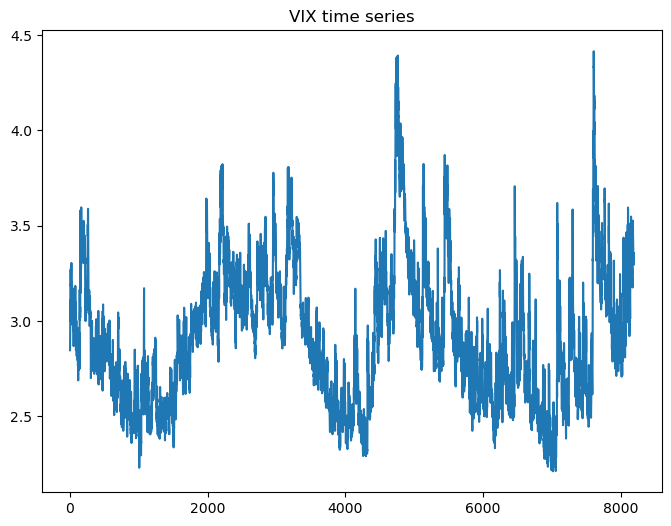

In [478]:
# Read data
PData = pd.read_csv("VIX_History_L4.csv")

YDatapd = PData[["CLOSE"]]
YData = YDatapd.to_numpy()
YData = np.log(YData)
plt.plot(YData)
plt.title("VIX time series")

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

In [479]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import norm
# import pandas as pd

# # Likelihood function for an observation
# def likelihood(xi_prob, mu, sigma, y):
#     phi = norm.pdf((y - mu) / sigma)
#     y_like = np.dot(xi_prob, phi)
#     return y_like

# # Hamilton filtering algorithm (forward step)
# def forward_alg(pi_hat0, N, T, P, mu, sigma, Y):
#     xi_prob_t = np.zeros((T, N))  # Filtered probabilities
#     xi_prob_t1 = np.zeros((T, N))  # One-step ahead predictions

#     # Initialization for t=1
#     y_like = likelihood(pi_hat0, mu, sigma, Y[0])  # Initial likelihood
#     phi = np.array([norm.pdf((Y[0] - mu[ss2]) / sigma[ss2]) for ss2 in range(N)])  # Initial phi
#     xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like  # Update filtered probabilities
#     xi_prob_t1[0, :] = np.dot(P.T, xi_prob_t[0, :])  # Update one-step ahead predictions

#     # Recursive filtering for t=2,...,T
#     for tt in range(1, T):
#         y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])  # Update likelihood
#         phi = np.array([norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2]) for ss2 in range(N)])  # Update phi
#         xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like  # Update filtered probabilities
#         xi_prob_t1[tt, :] = np.dot(P.T, xi_prob_t[tt, :])  # Update one-step ahead predictions

#     return xi_prob_t, xi_prob_t1

# # Kim smoothing algorithm (backward step)
# def backward_alg(xi_prob_t, xi_prob_t1, N, T, P, mu, sigma, Y):
#     xi_prob_T = np.zeros((T, N))  # Smoothed probabilities
#     xi_prob_T[T - 1, :] = xi_prob_t[T - 1, :]  # Final state probabilities from the forward pass

#     # Recursive smoothing for t=T-1,...,1
#     for tt in range(T - 2, -1, -1):
#         xi_T_xi = np.divide(xi_prob_T[tt + 1, :], xi_prob_t1[tt, :])  # Ratio for smoothing step
#         xi_prob_T[tt, :] = xi_prob_t[tt, :] * np.dot(P, xi_T_xi)  # Update smoothed probabilities

#     return xi_prob_T

# # Maximization step (M-step) in the Expectation-Maximization algorithm
# def M_step_func(xi_prob, P, N, T, Y):
#     mu_hat = np.zeros(N)  # Estimated means
#     sigma_hat = np.zeros(N)  # Estimated volatilities
#     P_hat = np.zeros((N, N))  # Estimated transition probabilities
#     pi_hat = np.zeros(N)  # Estimated initial probabilities

#     # Update the estimates for each state
#     for ss in range(N):
#         xi_y = np.dot(xi_prob[:, ss], Y)
#         mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])  # Estimate for mean
        
#         xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
#         sigma_hat[ss] = np.sqrt(xi_y_mu2 / np.sum(xi_prob[:, ss]))  # Estimate for standard deviation
        
#         # Update the transition probabilities
#         for ss2 in range(N):
#             P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(P[ss, :, 1:])  # Estimate for transition matrix

#         pi_hat[ss] = xi_prob[0, ss]  # Initial state probability estimate

#     return mu_hat, sigma_hat, P_hat, pi_hat

# # Read data
# PData = pd.read_csv("VIX_History_L4.csv")

# YDatapd = PData[["CLOSE"]]
# YData = YDatapd.to_numpy()
# YData = np.log(YData)
# plt.plot(YData)
# plt.title("VIX time series")

# fig = plt.gcf()
# fig.set_size_inches(8, 6)
# plt.show()

# # Initialize parameters
# T = len(YData)
# N = 2

# # SET INITIAL GUESSES
# mu_hat0 = np.array([2, 4])  # Ensure it's a 1D array
# sigma_hat0 = np.array([0.1, 0.1])  # Ensure it's a 1D array
# P_hat0 = np.zeros((N, N))

# P_hat0[0, 0] = 0.75
# P_hat0[0, 1] = 1 - P_hat0[0, 0]
# P_hat0[1, 1] = 0.7
# P_hat0[1, 0] = 1 - P_hat0[1, 1]

# # Set initial guess for pi_hat0 as a 1D array
# pi_hat0 = np.array([0.5, 0.5])

# # Iterate to reach steady-state initial probabilities
# for _ in range(100):
#     pi_hat0 = np.dot(P_hat0.T, pi_hat0)
#     pi_hat0 = pi_hat0 / np.sum(pi_hat0)  # Normalize to ensure it stays a probability distribution

# # Determine maximum number of iterations until convergence and convergence tolerance
# itemax = 200
# itetol = 1e-2

# for ite in range(0, itemax):
#     print(f"Iteration {ite}: mu_hat = {mu_hat0}, sigma_hat = {sigma_hat0}, P_hat = {P_hat0}, pi_hat = {pi_hat0}")

#     # E-step
#     xi_prob_t, xi_prob_t1 = forward_alg(
#         pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData
#     )
#     xi_prob_T = backward_alg(
#         xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData
#     )

#     # Plot the smoothed probabilities
#     plt.figure(figsize=(16, 6))
#     plt.subplot(1, 2, 1)
#     plt.plot(xi_prob_T[:, 0])
#     plt.title("State 1 Probability")
    
#     plt.subplot(1, 2, 2)
#     plt.plot(xi_prob_T[:, 1])
#     plt.title("State 2 Probability")
    
#     plt.tight_layout()
#     plt.show()

#     # Compute Pr(s_t+1 = j, s_t = i)
#     P_hat_T = np.zeros((N, N, T))
#     for tt in range(1, T):
#         for ss in range(N):
#             for ss2 in range(N):
#                 P_hat_T[ss, ss2, tt] = (
#                     P_hat0[ss, ss2]
#                     * xi_prob_t[tt - 1, ss]
#                     * xi_prob_T[tt, ss2]
#                     / xi_prob_t1[tt - 1, ss2]
#                 )

#     # M-step
#     mu_hat1, sigma_hat1, P_hat1, pi_hat1 = M_step_func(xi_prob_T, P_hat_T, N, T, YData)

#     # Compute convergence criteria
#     diff = np.zeros(4)
#     diff[0] = np.sum(np.abs(mu_hat1 - mu_hat0)) / (np.min(mu_hat0) + itetol * 1e-2)
#     diff[1] = np.sum(np.abs(sigma_hat1 - sigma_hat0)) / (np.min(sigma_hat0) + itetol * 1e-2)
#     diff[2] = np.sum(np.abs(P_hat1 - P_hat0)) / (np.min(P_hat0) + itetol * 1e-2)
#     diff[3] = np.sum(np.abs(pi_hat1 - pi_hat0)) / (np.min(pi_hat0) + itetol * 1e-2)

#     print(f"Iteration {ite}, Max difference: {np.max(diff):.5f}")

#     if np.max(diff) > itetol:
#         mu_hat0, sigma_hat0, P_hat0, pi_hat0 = mu_hat1, sigma_hat1, P_hat1, pi_hat1
#     else:
#         print(f"Converged at iteration {ite}: mu_hat = {mu_hat1}, sigma_hat = {sigma_hat1}, P_hat = {P_hat1}, pi_hat = {pi_hat1}")
#         break


In [480]:
P = np.array([
    [0.81, 0.19],
    [0.72, 0.28]
])

np.linalg.matrix_power(P, 100)

array([[0.791, 0.209],
       [0.791, 0.209]])

In [481]:
pi_0 = P[0, :]

pi_0 @ P

array([0.793, 0.207])

In [482]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(12345)

# Transition matrix
P = np.array([[0.9, 0.09, 0.01],  # From Investment
              [0.1, 0.85, 0.05],  # From Speculative
              [0.0, 0.00, 1.0]])  # From Default (absorbing)

# Number of simulations and maximum years
N_HISTORIES = 1000
MAX_YEARS = 100

# Function to simulate time to default for a firm starting in Speculative
def simulate_time_to_default():
    state = 1  # Start in Speculative (state 1)
    for year in range(1, MAX_YEARS + 1):
        state = np.random.choice([0, 1, 2], p=P[state])
        if state == 2:  # If firm defaults (state 2)
            return year
    return MAX_YEARS  # If firm does not default within 100 years

# Simulate 1,000 histories
times_to_default = np.array([simulate_time_to_default() for _ in range(N_HISTORIES)])

# Calculate expected time to default
expected_time_to_default = np.mean(times_to_default)

print("Expected time to default:", expected_time_to_default)


Expected time to default: 30.855


In [483]:
P = np.array([
    [0.8, 0.2],
    [0.3, 0.7]
])

zeta = np.array([0.75, 0.25])

zeta[1] * P[1, :]

array([0.075, 0.175])

In [484]:
import scipy.stats as st

P_new = np.array([
    [0.6, 0.15],
    [0.075, 0.175]]
)

P_new_idx = np.array([
    [(-1, -1), (-1, +1)],
    [(+1, -1), (+1, +1)]
])

In [485]:
phi_y = np.array([
    [st.norm.pdf(-0.9 - (-1)) * st.norm.pdf(1), st.norm.pdf(-0.9 - (-1)) * st.norm.pdf(1)],
    [st.norm.pdf(-0.9 - (1)) * st.norm.pdf(1), st.norm.pdf(-0.9 - (1)) * st.norm.pdf(1)]
])

In [486]:
(P_new * phi_y)

array([[0.058, 0.014],
       [0.001, 0.003]])

In [487]:
P = np.array([
    [0.25, 0.25, 0.5],
    [0.1, 0.8, 0.1],
    [0.1, 0.4, 0.5]
])

np.random.seed(12345)

P_count = np.zeros(P.shape)
current_state = 0
for i in range(10000):
    new_state = np.random.choice(3, p=P[current_state, :])
    P_count[current_state, new_state] += 1
    current_state = new_state

P_count

array([[ 307.,  266.,  584.],
       [ 604., 5072.,  654.],
       [ 245.,  993., 1275.]])